In [1]:
import mdptoolbox
import numpy as np
import scipy as sc
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt

In [2]:
n = 10

In [27]:
def states_actions():
    
    states_dict = {'acceptance state': 0, 'rejection state': 2, 'continuation state': 1}
    
    actions_dict = {}
    
    for i in range(-n, n+1):
        actions_dict['change bid ' + str(i) + '%'] = i
    
    return states_dict, actions_dict

In [28]:
states_actions()

({'acceptance state': 0, 'rejection state': 2, 'continuation state': 1},
 {'change bid -10%': -10,
  'change bid -9%': -9,
  'change bid -8%': -8,
  'change bid -7%': -7,
  'change bid -6%': -6,
  'change bid -5%': -5,
  'change bid -4%': -4,
  'change bid -3%': -3,
  'change bid -2%': -2,
  'change bid -1%': -1,
  'change bid 0%': 0,
  'change bid 1%': 1,
  'change bid 2%': 2,
  'change bid 3%': 3,
  'change bid 4%': 4,
  'change bid 5%': 5,
  'change bid 6%': 6,
  'change bid 7%': 7,
  'change bid 8%': 8,
  'change bid 9%': 9,
  'change bid 10%': 10})

In [29]:
# dummy transition matrix since we are using q learning which is model free
def transition():
    t_lst = []
    for i in range(-n, n+1):
        t_lst.append(np.eye(3))     
    return t_lst

In [30]:
def rewards(initial_offer, list_price):
    
    increment = initial_offer/100
        
    R = np.zeros((3, 2*n+1))
    for i in range(-n, n+1):
        s = (initial_offer - increment*i - list_price)/initial_offer
        # for state = 0 i.e. accept
        R[0][i] = 1 + s
        # reject
        R[1][i] = -1
        # continue
        R[2][i] = s     
    
    return R       

In [35]:
P = transition()
R = np.array(rewards(initial_offer = 50, list_price = 50))

Text(0, 0.5, '% Change from Initial Offer')

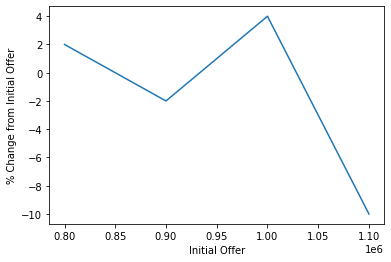

In [38]:
listing_price = 1e6
offer_lst = []
policies = []
for initial_offer in np.arange(8e5, 1.2e6, 1e5):
    R = np.array(rewards(initial_offer, listing_price))
    pi = mdptoolbox.mdp.QLearning(P, R, 0.99)
    pi.run()
    c = np.reshape(pi.policy, 3)
    offer_lst.append(initial_offer)
    policies.append(c[2] - n)
plt.plot(offer_lst, policies)
plt.xlabel("Initial Offer")
plt.ylabel('% Change from Initial Offer')

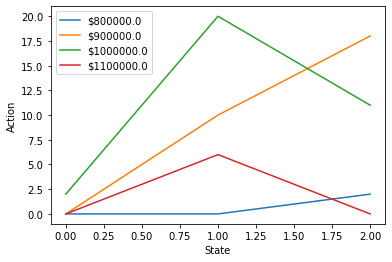

In [46]:
listing_price = 1e6
offer_lst = []
policies = []
for initial_offer in np.arange(8e5, 1.2e6, 1e5):
    R = np.array(rewards(initial_offer, listing_price))
    pi = mdptoolbox.mdp.QLearning(P, R, 0.99)
    pi.run()
    c = np.reshape(pi.policy, 3)
    plt.plot(c, label = '$' + str(initial_offer))
plt.xlabel("State")
plt.ylabel('Action')
plt.legend()
plt.show()